<div style="padding: 0.5em; background-color: #1876d1; color: #fff;">

### **[Part 5] Computational Drug Discovery - Comparing Regressors**

</div>
In Part 5, we will be comparing several ML algorithms for build regression models of Aromatose inhibitors.

Note :
* Target enzyme: Aromatase responsible for breast cancer
* Objective: find compound that inhibit Aromatase function

---
<b># Bioinformatics Project </b>

## **1. Import libraries**

In [5]:
! pip install lazypredict

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

You may need to fix issue here related to OneHotencoding while importing lazypredict regressor. For scikit-learn version 0.22 and earlier
`OneHotEncoder(handle_unknown='ignore', sparse=False)`. For scikit-learn version 1.0 and later
`OneHotEncoder(handle_unknown='ignore', sparse_output=False)`

## **2. Load the data set**


In [9]:
df = pd.read_csv('data/06-bioactivity_data_3classpubchem_fp.csv')

In [10]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [11]:
# Examine X dimension
X.shape

(2597, 881)

In [12]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(2597, 174)

In [13]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

Let's know that here model building is done uwing default 42 models hyperparameters. But we can also try to to hyperparameter optimization which ay lead into more consuming time task but for sur with better results. Here in this notebook we keep the default paramters.

In [14]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train, predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test, predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 41/42 [03:06<00:02,  2.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 522
[LightGBM] [Info] Number of data points in the train set: 2077, number of used features: 174
[LightGBM] [Info] Start training from score 6.002116


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [03:08<00:00,  4.48s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 41/42 [03:34<00:02,  2.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 522
[LightGBM] [Info] Number of data points in the train set: 2077, number of used features: 174
[LightGBM] [Info] Start training from score 6.002116


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [03:35<00:00,  5.13s/it]


In [15]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.82,0.83,0.52,0.10
ExtraTreeRegressor,0.82,0.83,0.52,0.10
ExtraTreesRegressor,0.82,0.83,0.52,2.90
GaussianProcessRegressor,0.82,0.83,0.52,1.49
XGBRegressor,0.80,0.82,0.53,0.38
RandomForestRegressor,0.79,0.80,0.56,2.43
BaggingRegressor,0.77,0.79,0.58,0.15
MLPRegressor,0.74,0.76,0.61,54.56
HistGradientBoostingRegressor,0.70,0.72,0.66,10.22


In [16]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.28,0.52,0.90,2.70
BaggingRegressor,0.28,0.52,0.90,0.30
HistGradientBoostingRegressor,0.26,0.51,0.91,1.08
XGBRegressor,0.26,0.51,0.91,0.34
LGBMRegressor,0.25,0.50,0.92,1.27
MLPRegressor,0.18,0.45,0.96,76.26
SVR,0.17,0.45,0.97,0.80
GradientBoostingRegressor,0.16,0.44,0.98,1.49
NuSVR,0.16,0.44,0.98,1.08


In [18]:
#combined_predictions_df = pd.concat([predictions_train, predictions_test], axis=1, keys=['Train', 'Test'])
#combined_predictions_df

## **5. Data visualization of model performance**

[(0.0, 1.0)]

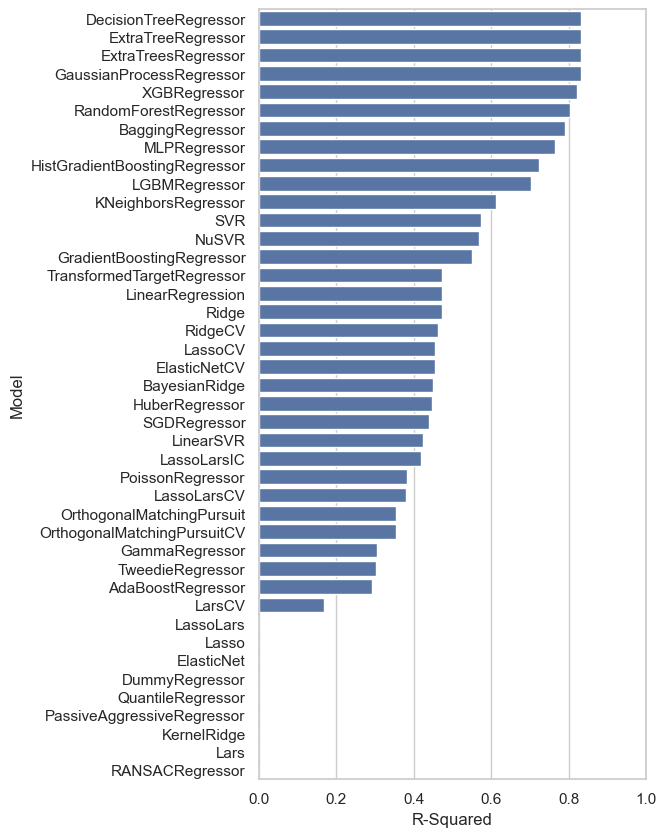

In [19]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

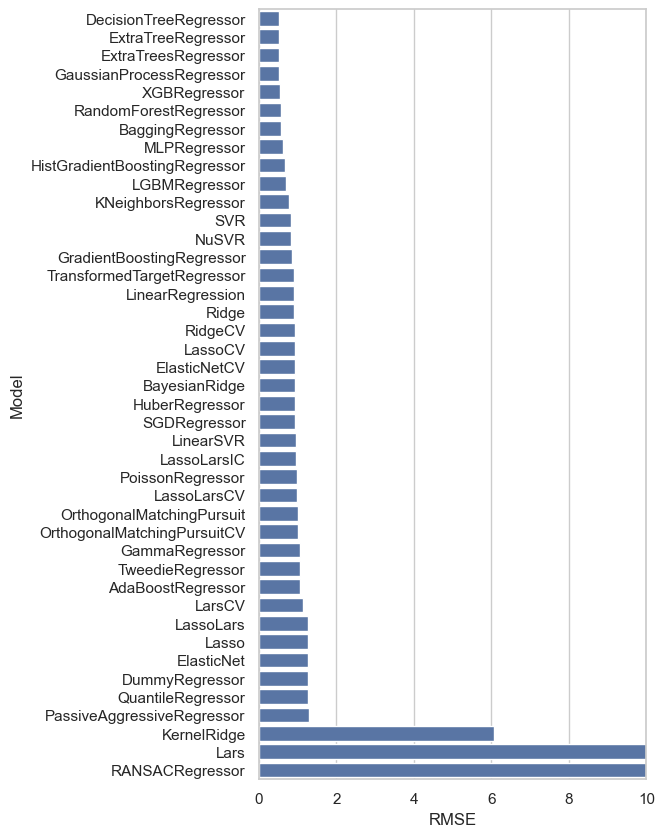

In [20]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

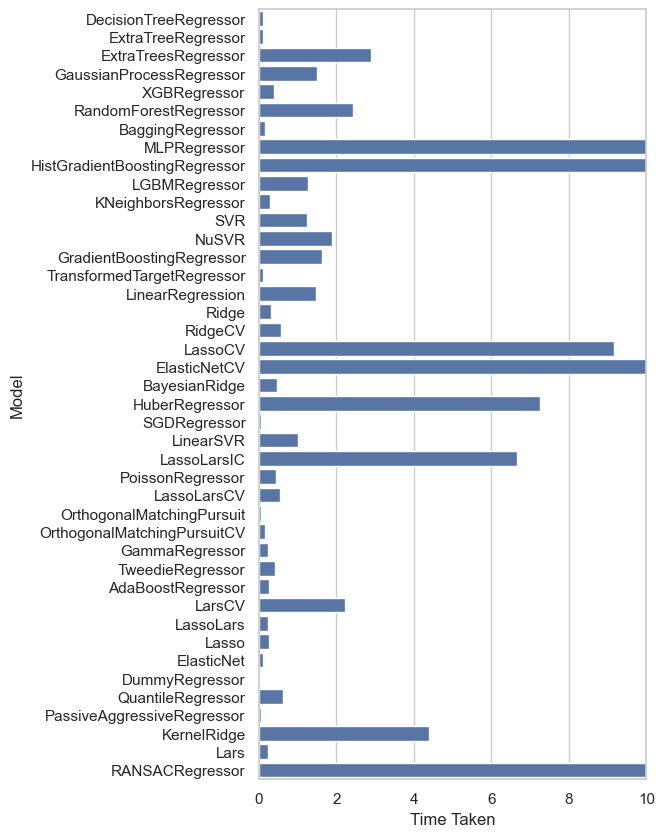

In [21]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

In [24]:
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.28,0.52,0.90,2.70
BaggingRegressor,0.28,0.52,0.90,0.30
HistGradientBoostingRegressor,0.26,0.51,0.91,1.08
XGBRegressor,0.26,0.51,0.91,0.34
LGBMRegressor,0.25,0.50,0.92,1.27
MLPRegressor,0.18,0.45,0.96,76.26
SVR,0.17,0.45,0.97,0.80
GradientBoostingRegressor,0.16,0.44,0.98,1.49
NuSVR,0.16,0.44,0.98,1.08


---

---